In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
data = load_wine()

X = data.data
y = data.target
target_names = data.target_names

In [7]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

Text(0, 0.5, 'Principal Component 2')

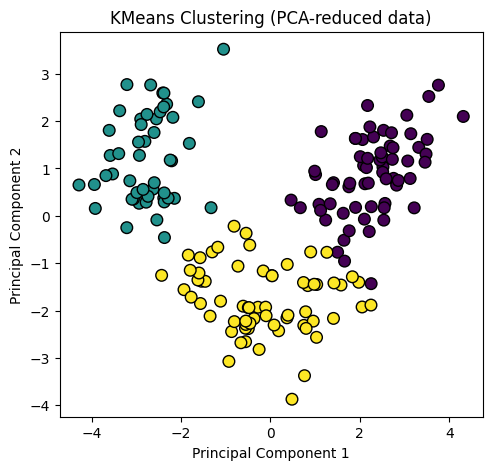

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=70)
plt.title("KMeans Clustering (PCA-reduced data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

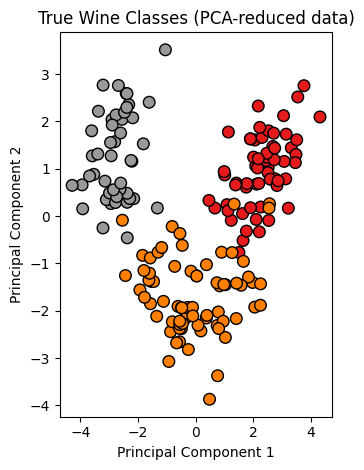

In [18]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', edgecolor='k', s=70)
plt.title("True Wine Classes (PCA-reduced data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [19]:
ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.8951
